In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
data = np.transpose(np.loadtxt("AlphaCMs.txt",skiprows = 1))
GV = data[0]
alphaEn = data[1]
alphaErr = data[2]

In [3]:
GV

array([ 950., 1000.,  975.,  860.,  813., 2460., 2137., 1045.,  920.,
        898., 1055.,  835.,  880., 2564., 1034., 1400.])

In [4]:
#til at slå op i masses.dat
data = np.transpose(np.loadtxt("masses.txt"))

N=data[0]
Z=data[1]
A=data[2]
massExcess=data[3]
bEPrNkl=data[4]

mp = 938.272*1000
me = 0.510998*1000
mn = 939.565*1000

def me2(a, z):
    a_indices = np.where(A == a)
    z_indices = np.where(Z == z)
    a = lambda: print('Could not find mass excess for given numbers')
    for i in range(len(a_indices[0])):
        if np.any(z_indices[0] == a_indices[0][i]):
            me = bEPrNkl[a_indices[0][i]]
            a = lambda: me
    return a()

def m2(a,z): 
    return mp*z+(a-z)*mn-me2(a,z)*a

In [5]:
mp = 938272.08816
mAl = m2(27,13)
mO = m2(16,8)
mN = m2(15,7)
mC = m2(12,6)
mHe = m2(4,2)

In [17]:
def cmEcalc(gv,a):
    accE = gv*a
    mb = mp
    mt = mN
    ms = mHe
    ml = mC
    beta = np.sqrt(((accE+mb)**2-mb**2))/(accE+mb+mt)
    pz = np.sqrt((accE+mb)**2-mb**2)
    en = accE + mb + mt
    gamma = 1/np.sqrt(1-beta**2)
    pzCM = gamma*(pz - beta*en)
    enCM = gamma*(en - beta*pz)
    return (enCM**2+ms**2-ml**2)/(2*enCM)-ms

In [18]:
popt, pcov = curve_fit(cmEcalc,GV,alphaEn,p0 = 1.16, sigma = alphaErr, absolute_sigma = False)

Text(0.5, 1.0, 'Accelerator calibration with $\\alpha_0$')

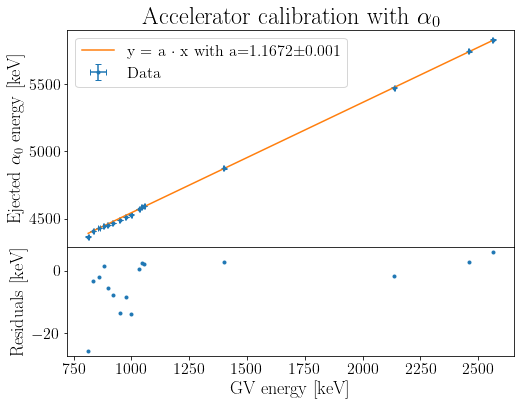

In [19]:
GVarray = np.linspace(min(GV), max(GV),1000)
fig, ax = plt.subplots(2,1,figsize = [8,6],sharex = True,gridspec_kw={'height_ratios': [2, 1]})
ax[0].errorbar(GV,alphaEn,xerr=2.5,yerr=alphaErr,fmt='.',capsize=3,label='Data')
ax[0].plot(GVarray,cmEcalc(GVarray,*popt), label = r'y = a $\cdot$ x with a=' + str(np.round(popt[0],4)) + r"$\pm$" + str(np.round(np.sqrt(pcov[0])[0],3)))
ax[1].set_xlabel('GV energy [keV]')
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylabel(r'Ejected $\alpha_0$ energy [keV]')
ax[0].legend()
ax[1].set_ylabel('Residuals [keV]')
ax[1].plot(GV,alphaEn-cmEcalc(GV,*popt),'.')
ax[0].set_title(r'Accelerator calibration with $\alpha_0$')

In [20]:
popt

array([1.1671594])